Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [2]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [11]:
from thinkstats2 import Cdf

alive = preg[preg.nbrnaliv > 0]
cdf = Cdf(alive.totalwgt_lb)

Display the CDF.

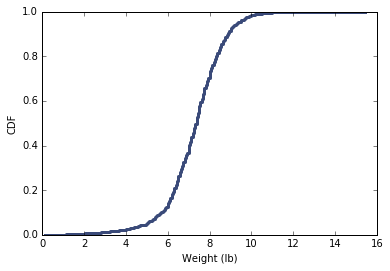

In [12]:
import thinkplot

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Weight (lb)', ylabel='CDF')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [22]:
my_weight = 8
my_prob = cdf.Prob(my_weight)
print my_prob

0.733237441912


If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [23]:
others = alive[alive.pregordr != 1]
cdf_others = Cdf(others.totalwgt_lb)


print cdf_others.Value(my_prob)

8.125


Compute the percentile rank of your birthweight

In [15]:
print cdf_others.PercentileRank(my_weight)

72.0384951881


Compute the median birth weight by looking up the value associated with p=0.5.

In [25]:
median = cdf_others.Value(0.5)
print median

7.375


Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [26]:
prob25 = cdf_others.Value(0.25)
prob75 = cdf_others.Value(0.75)
iqr = prob75 - prob25
print iqr

1.6875


Make a random selection from <tt>cdf</tt>.

In [30]:
import numpy as np
weights = np.random.choice(others.totalwgt_lb, 100, replace=True)

Draw a random sample from <tt>cdf</tt>.

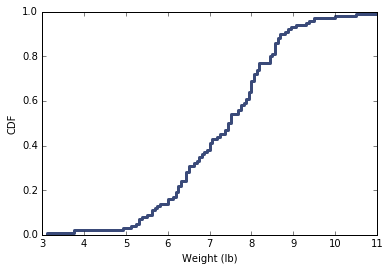

In [31]:
sample_cdf = Cdf(weights)
thinkplot.cdf(sample_cdf)
thinkplot.Show(xlabel='Weight (lb)', ylabel='CDF')

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

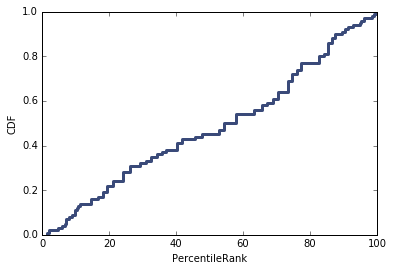

In [34]:
ranks = map(cdf.PercentileRank, weights)
rank_cdf = Cdf(ranks)
thinkplot.cdf(rank_cdf)
thinkplot.Show(xlabel='PercentileRank', ylabel='CDF')

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

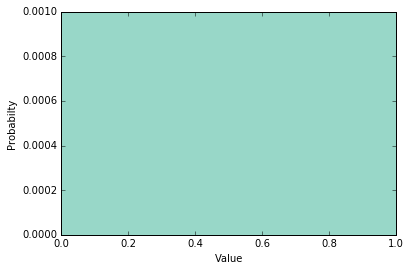

In [42]:
from thinkstats2 import Pmf

nums = []
for _ in range(1000):
    nums.append(random.random())

pmf = Pmf(nums)
thinkplot.pmf(pmf)
thinkplot.Show(xlabel='Value', ylabel='Probabilty')

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

In [ ]:
cdf = Cdf(nums)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Value', ylabel='CDF')

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.